<a href="https://colab.research.google.com/github/ashish-ty/Image_Restoration/blob/main/project_1_deblur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import random


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train/255, x_test/255

4431872/4422102 [==============================] - 0s 0us/step


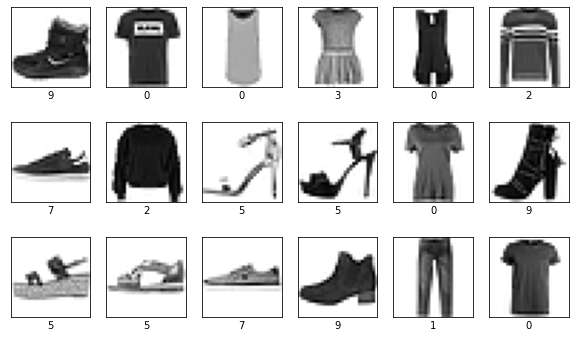

In [ ]:
class_names = list(range(10))
plt.figure(figsize=(10,6))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
def add_noise(X):
    result = []
    for img in X:
        noisy = cv2.GaussianBlur(img, (3, 3), 0)
        noisy = np.clip(noisy, 0, 1)
        result.append(noisy)
    return np.array(result)

In [ ]:
noise_train = add_noise(x_train)
noise_test = add_noise(x_test)

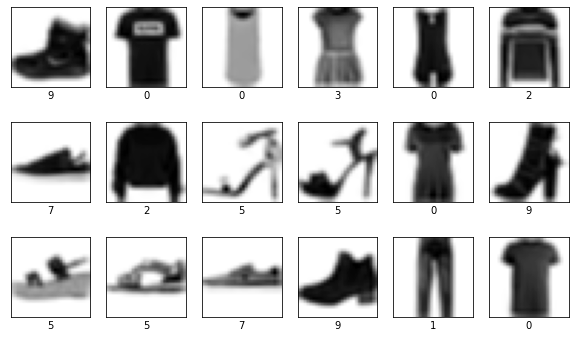

In [ ]:
class_names = list(range(10))
plt.figure(figsize=(10,6))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(noise_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
model = models.Sequential()

#encode

model.add(layers.Conv2D(64, (9, 9), strides = 1, padding = 'same', input_shape = (28, 28, 1)))
model.add(layers.Conv2D(32, (7, 7), strides = 1, padding = 'same'))
model.add(layers.Conv2D(3, (5, 5), strides = 1, padding = 'same'))

#latent
# model.add(layers.Conv2D(8, (2, 2), strides = 1, padding = 'same'))

#decode
model.add(layers.Conv2DTranspose(3, (5, 5), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(32, (7,7), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(64, (9, 9), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(1, (1, 1), strides = 1, activation = 'sigmoid', padding = 'same'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 64)        5248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        100384    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 3)         2403      
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 28, 28, 3)         228       
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 28, 28, 32)        4736      
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 28, 28, 64)        165952    
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 28, 28, 1)        

In [ ]:
model.compile(loss = 'mse', optimizer = 'adam',metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    model.fit(noise_train.reshape(-1, 28, 28, 1), x_train.reshape(-1, 28, 28, 1), epochs = 30, batch_size = 2000, 
              validation_data = (noise_test.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Epoch 1/30
30/30 [==============================] - 92s 2s/step - loss: 0.0759 - accuracy: 0.4773 - val_loss: 0.0210 - val_accuracy: 0.5063
Epoch 2/30
30/30 [==============================] - 44s 1s/step - loss: 0.0157 - accuracy: 0.5093 - val_loss: 0.0125 - val_accuracy: 0.5074
Epoch 3/30
30/30 [==============================] - 45s 1s/step - loss: 0.0107 - accuracy: 0.5098 - val_loss: 0.0092 - val_accuracy: 0.5076
Epoch 4/30
30/30 [==============================] - 45s 1s/step - loss: 0.0085 - accuracy: 0.5099 - val_loss: 0.0083 - val_accuracy: 0.5077
Epoch 5/30
30/30 [==============================] - 46s 2s/step - loss: 0.0074 - accuracy: 0.5100 - val_loss: 0.0065 - val_accuracy: 0.5078
Epoch 6/30
30/30 [==============================] - 46s 2s/step - loss: 0.0060 - accuracy: 0.5100 - val_loss: 0.0057 - val_accuracy: 0.5078
Epoch 7/30
30/30 [==============================] - 44s 1s/step - loss: 0.0054 - accuracy: 0.5100 - val_loss: 0.0053 - val_accuracy: 0.5079
Epoch 8/30
30/30 [==

In [ ]:
#utility function to pick samples to be tested
def get_samples(arr, n):
    temp = random.sample(range(len(arr)), n)
    result = arr[temp]
    return result, temp

In [ ]:
num = 10
org, temp = get_samples(x_test, num)
blur = noise_test[temp]
preds = model.predict(blur.reshape(-1, 28, 28, 1))
preds = preds.reshape(-1, 28, 28)

Original Images


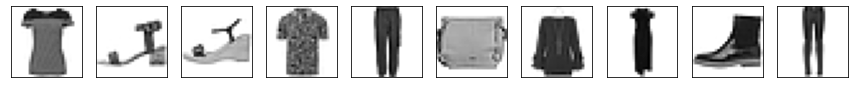

Blurred Images


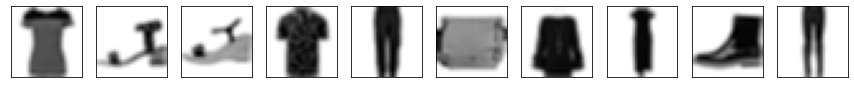

Predicted Images


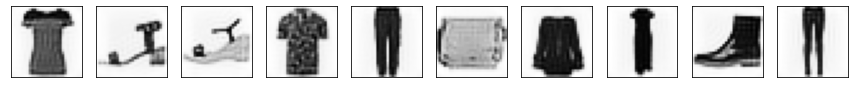

In [ ]:
plt.figure(figsize = (15, 15))
print('Original Images')
for i in range(num):
    plt.subplot(1, num, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(org[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Blurred Images')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(blur[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Predicted Images')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preds[i], cmap=plt.cm.binary)
plt.show()